### Importing necessary packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### 1 Importing the data

In [23]:
data  = pd.read_csv('oasis_longitudinal.csv')

In [24]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### 2 Understanding the high level details about the data

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [26]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

##### There are 19 missing values in the "SES" and 2 missing values in the "MMSE" features. The dataset contains 15 features and as well as 373 rows.

### 3 Exploring the data through visualizations

#### 3.1 Exploring Group features

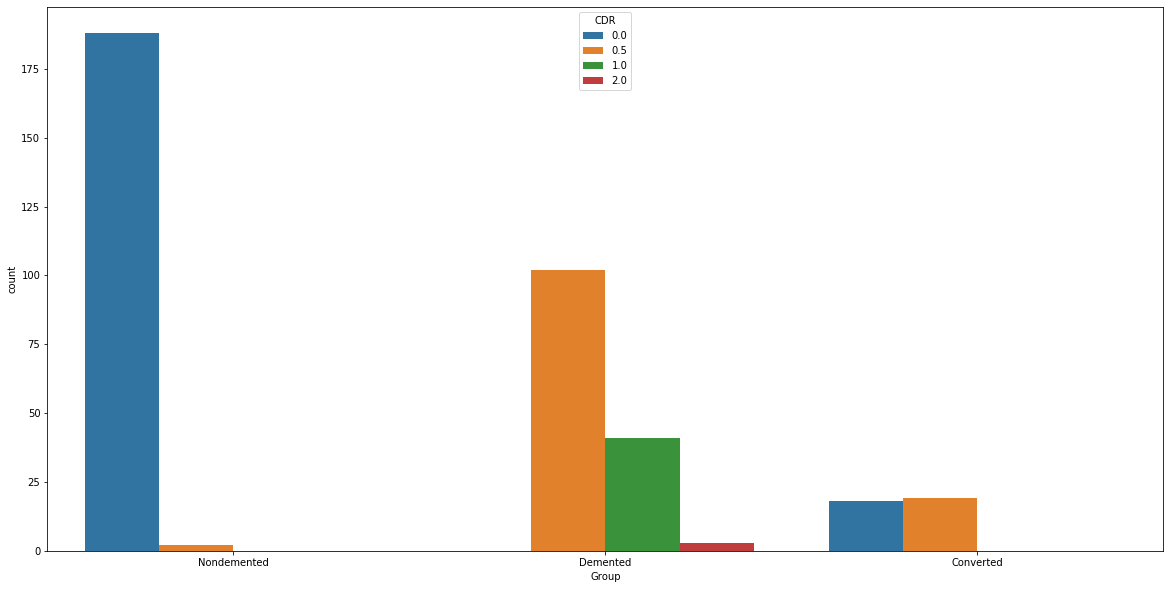

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="Group",hue="CDR")

#### Even though a subject is put under a group of "Non Demented", A few of them have a clinical dementia rating as 0.5(MILD). Majority of the people who got converted from mild cognitive impairment to Dementia have a CDR of 1.0 or 0.5.

#### 3.2 Exploring visit features

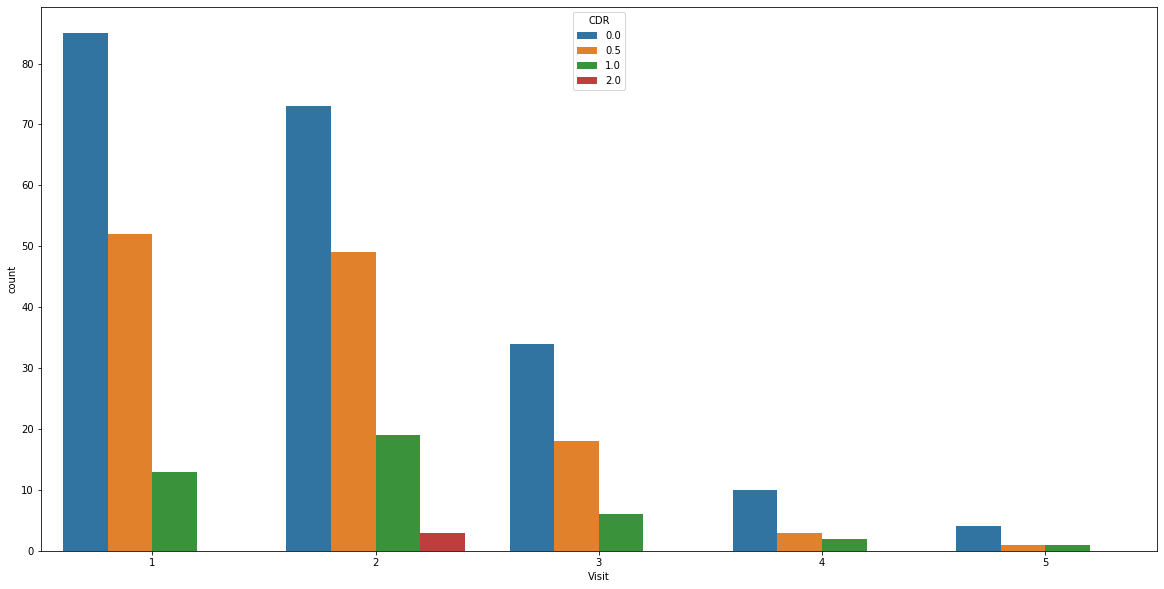

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="Visit",hue="CDR")

#### There are only few people who visited >4 number of times.

#### 3.3 Exploring the MR Delay feature

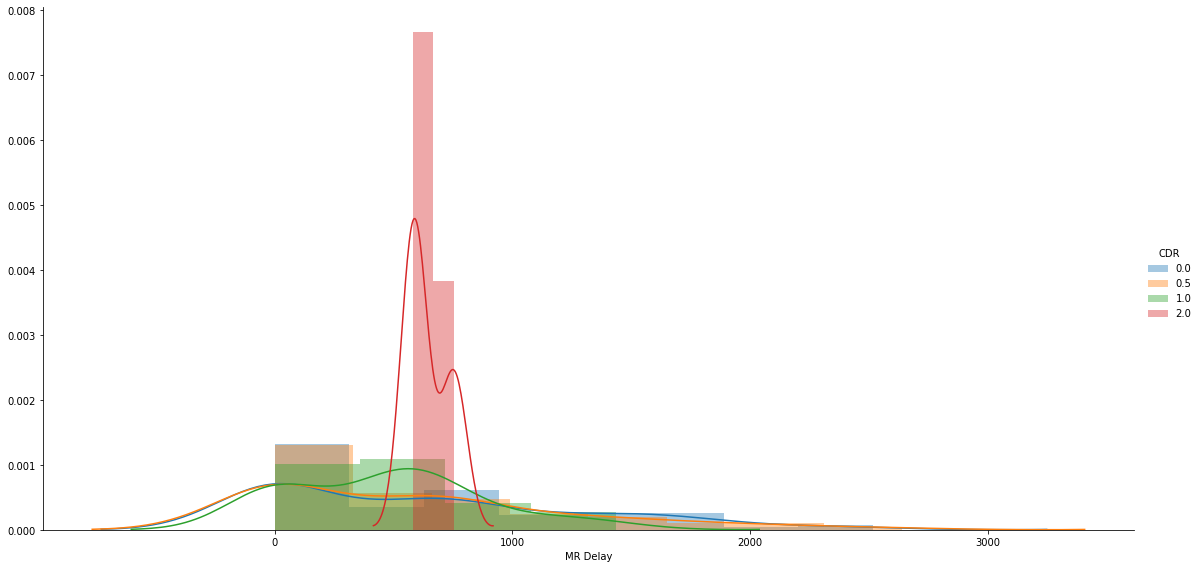

In [30]:
sns.FacetGrid(data=data,hue="CDR",height=8,aspect=2).map(sns.distplot,"MR Delay").add_legend()

#### 3.4 Exploring the gender features

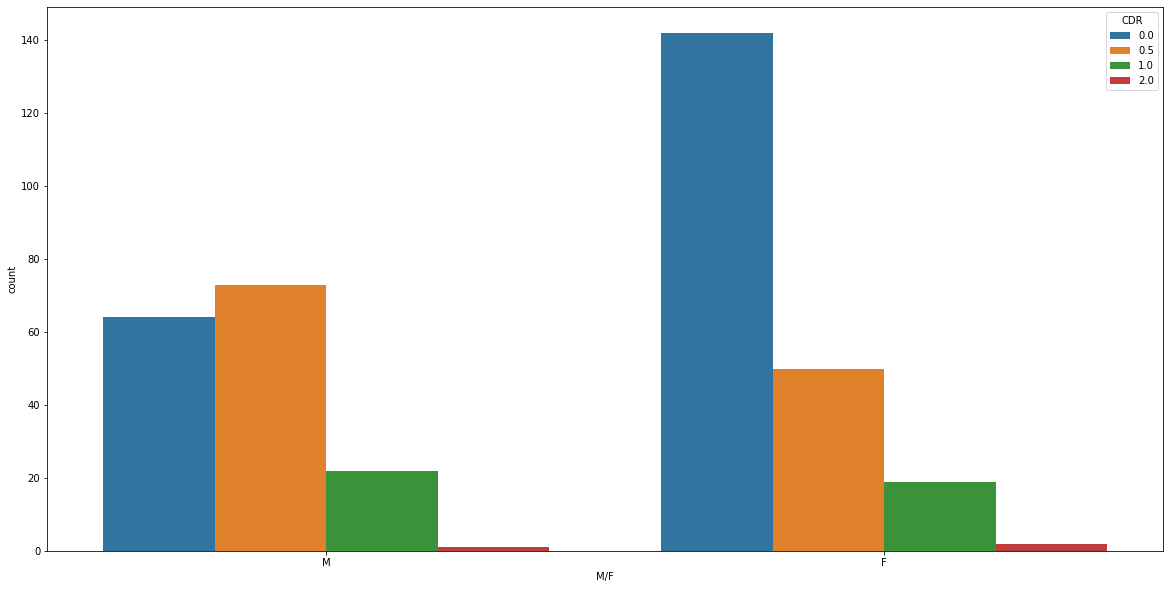

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="M/F",hue="CDR")

#### There are slightly more number of males who are suffering from dementia rather than females.

#### 3.5 Exploring the age feature

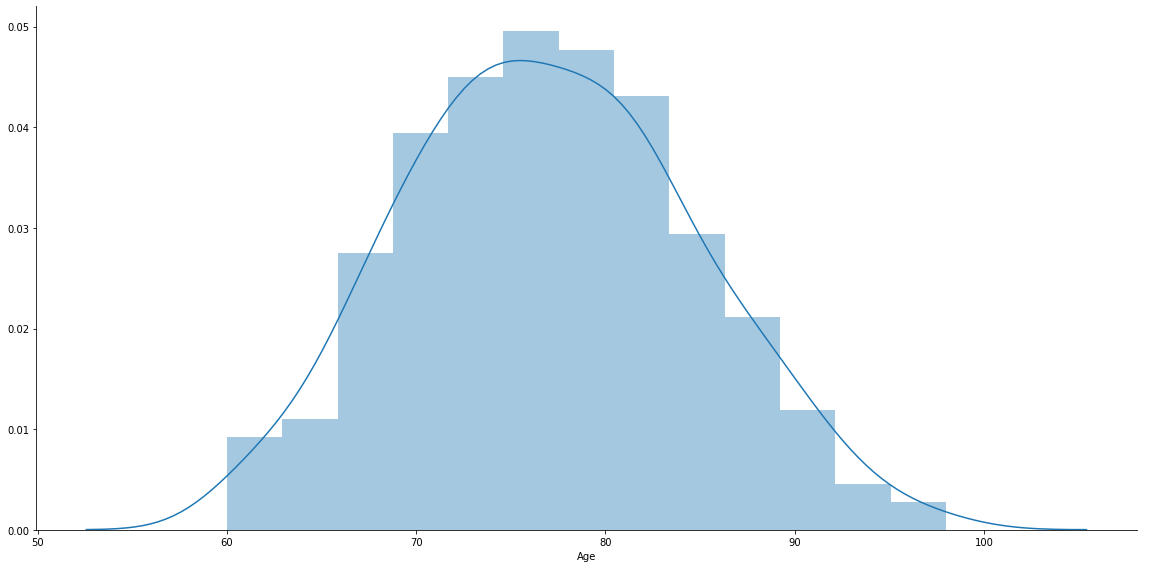

In [32]:
sns.FacetGrid(data=data,height=8,aspect=2).map(sns.distplot,"Age").add_legend()

##### The age feature follows a gaussian distribution. We can further analyze this feature to gain more insights.

#### PDF v/s CDF for the Age attribute  : 

Text(0.5, 1.0, 'PLOTTING PDF v/s CDF FOR AGE')

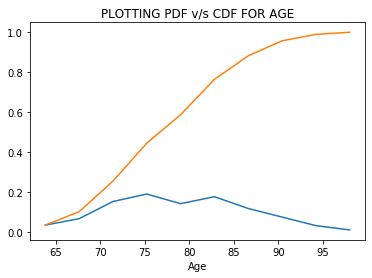

In [33]:
count1,binedges1 = np.histogram(data['Age'], bins=10, density = True)
pdf1=count1/sum(count1)
cdf1=np.cumsum(pdf1)
plt.plot(binedges1[1:],pdf1)
plt.plot(binedges1[1:], cdf1)
plt.xlabel("Age")
plt.title("PLOTTING PDF v/s CDF FOR AGE")

#### 3.6 Exploring the Demographic features 

C:\Users\Kishan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Kishan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Kishan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kishan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


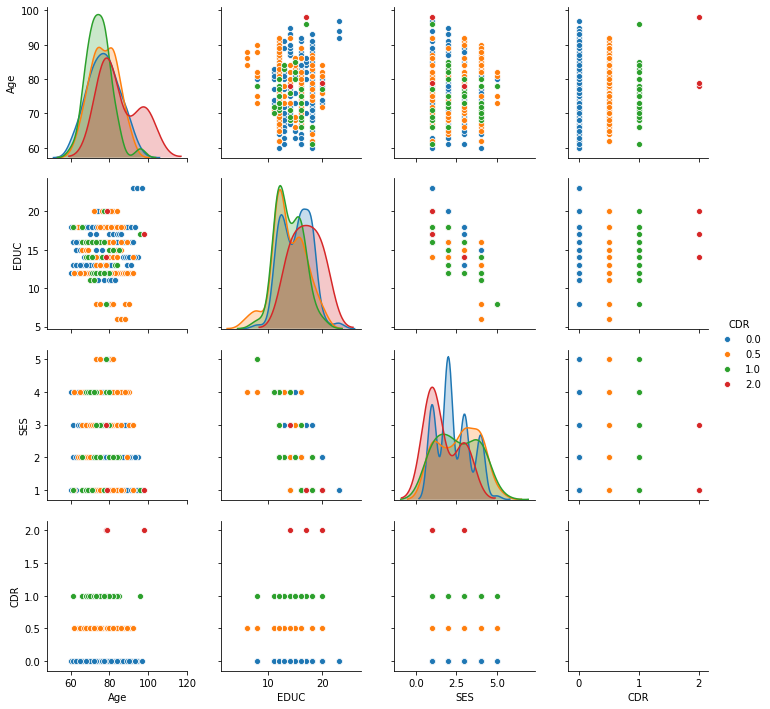

In [35]:
Demographics = data[['Age','EDUC','SES','CDR']]
sns.pairplot(Demographics,hue="CDR")

#### 3.7 Exploring the clinical features 

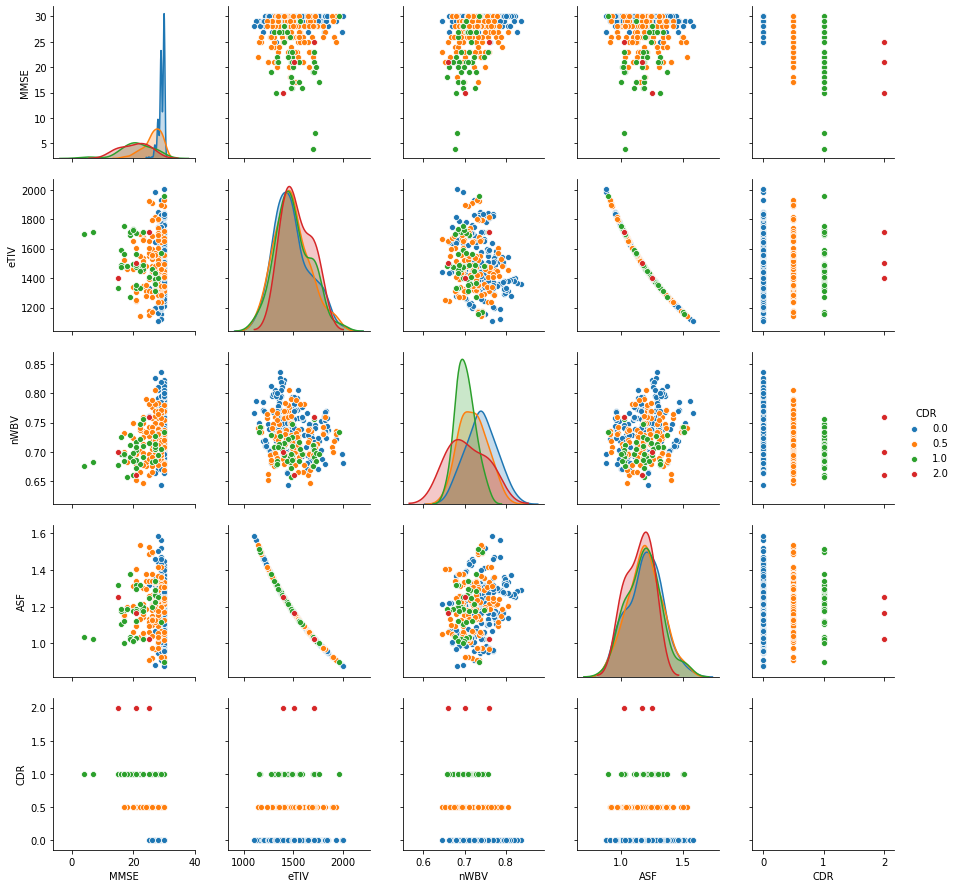

In [36]:
Clinical = data[['MMSE','eTIV','nWBV','ASF','CDR']]
sns.pairplot(Clinical,hue="CDR")

#### It is very clear that the eTIV and ASF features are negatively correlated. i.e As the eTIV value increases the ASF value decreases and vice versa.



### 4 Analyzing the imbalance in the data

Points with CDR = 0.0  are =  55.22788203753352 %
Points with CDR = 0.5 are =  32.975871313672926 %
Points with CDR = 1.0 are =  10.991957104557642 %
Points with CDR = 2.0 are =  0.8042895442359249 %


([<matplotlib.patches.Wedge at 0x1e3f5640b08>,
 [Text(-0.1799594079746407, 1.0851795296085422, '0.0'),
  Text(-0.2251403805952944, -1.0767134293884357, '0.5'),
  Text(1.0150396579339906, -0.4239038721470324, '1.0'),
  Text(1.0996524674345731, -0.027648704581864855, '2.0')],
 [Text(-0.09815967707707672, 0.5919161070592048, '55.2%'),
  Text(-0.12280384396106966, -0.587298234211874, '33.0%'),
  Text(0.5536579952367221, -0.23122029389838128, '11.0%'),
  Text(0.5998104367824943, -0.015081111590108099, '0.8%')])

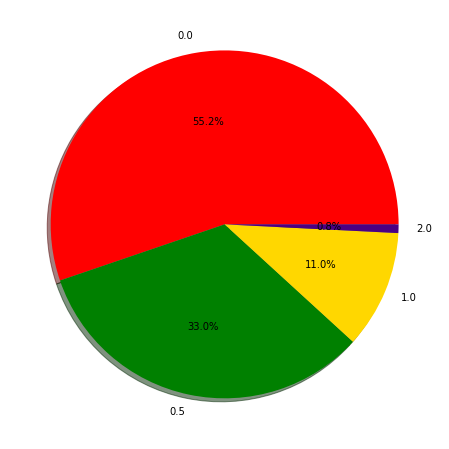

In [37]:
class_label = data['CDR'].value_counts()
total_points = len(data)
print("Points with CDR = 0.0  are = ",class_label.values[0]/total_points*100,"%")
print("Points with CDR = 0.5 are = ",class_label.values[1]/total_points*100,"%")
print("Points with CDR = 1.0 are = ",class_label.values[2]/total_points*100,"%")
print("Points with CDR = 2.0 are = ",class_label.values[3]/total_points*100,"%")
labels = ['0.0','0.5','1.0','2.0']
sizes = [55.22,32.97,10.99,0.80]
colors = ['red','green', 'gold','indigo']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

##### As there are more number of points with CDR = 0.0. And there are very few points with CDR = 1.0 (11%) and CDR = 2.0 (0.8%).

### 5 Making necessary assumtion and changes 

As the dataset is imbalanced, we cannot use the accuracy score as a metric to determine the correctness of our model. We would use ROC curves and AUC scores to determine the model.

Initially we are going to train a random model and use its accuracy as our baseline.

As to improve the AUC and reduce the generalization error we are going to use hyper parameter tuning to tune the hyper parameters of our models.

We are going to drop some columns which are not useful in building our model.

We are going to drop Subject ID, MRI ID, Hand (because all are right handed only).

From the plot of 7.7 we can understand that the features eTIV and ASF are negatively correlated. So We can either drop any one of the both features or keep them. Its better to analyze performance of the model with and without removing the collinear features.

### Dropping unnecessary columns

In [39]:
new_data =  data.drop(['Subject ID','MRI ID','Hand'],axis=1)

### checking the correction matrix

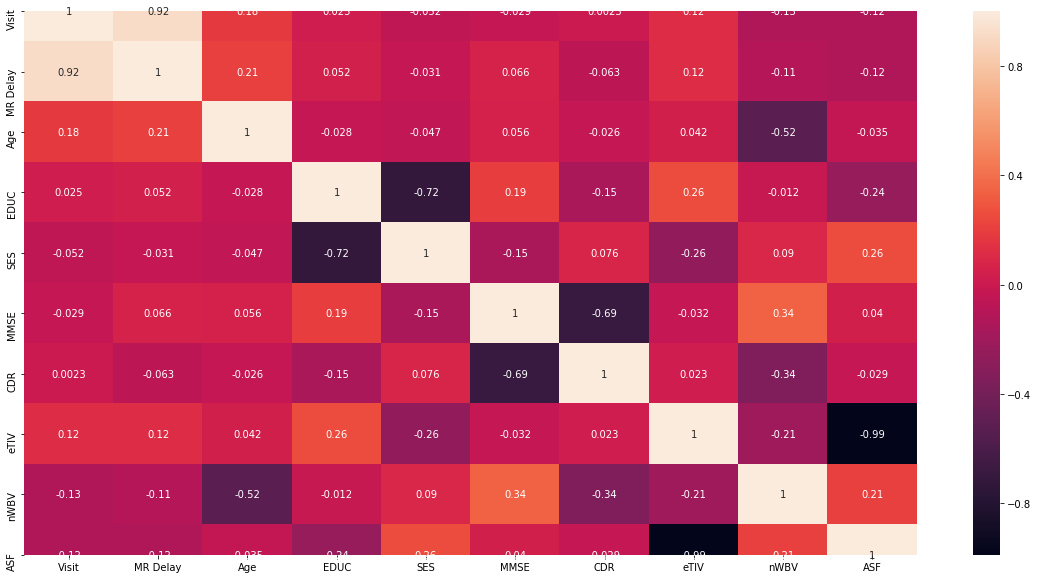

In [41]:
cor = new_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

#### From the above correlation plot, we can understand that the eTIV and ASF are highly correlated so we can safely drop one feature. And similarly (EDUC [==] SES) are negatively correlated and as well as (MRDelay [==] Visit) are positively correlated. We cannot be sure to remove any feature, as we donot know the consequences of it.

### 6 Dividing the data into train and test 

#### Dividing the data into X and Y 

In [42]:
x = new_data.drop(['CDR'],axis=1)
y = new_data['CDR'].values

#### Dividing he data into train and test sets

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)

Shape of x_train :  (261, 11)
Shape of x_test :  (112, 11)


### Feature Encoding 

#### 6.1 Encoding the Group feature

In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['Group'])
x_train_group = vectorizer.transform(x_train['Group'])
x_test_group = vectorizer.transform(x_test['Group'])
print(x_train_group.shape)
print(x_test_group.shape)


(261, 3)
(112, 3)


#### 6.2 Encoding the MR delay feature

In [46]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['MR Delay'].values.reshape(1,-1))
x_train_mrdelay = normalizer.transform(x_train['MR Delay'].values.reshape(1,-1)).T
x_test_mrdelay = normalizer.transform(x_test['MR Delay'].values.reshape(1,-1)).T
print(x_train_mrdelay.shape)
print(x_test_mrdelay.shape)

(261, 1)
(112, 1)


#### 6.3 Encoding the Gender feature

In [48]:
le = preprocessing.LabelEncoder()
le.fit(x_train['M/F'])
x_train_gender = le.transform(x_train['M/F']).reshape(1,-1).T
x_test_gender = le.transform(x_test['M/F']).reshape(1,-1).T
print(x_train_gender.shape)
print(x_test_gender.shape)

(261, 1)
(112, 1)


#### 6.4 Encoding the age feature 

In [51]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['Age'].values.reshape(1,-1))
x_train_age = normalizer.transform(x_train['Age'].values.reshape(1,-1)).T
x_test_age = normalizer.transform(x_test['Age'].values.reshape(1,-1)).T
print(x_train_age.shape)
print(x_test_age.shape)

(261, 1)
(112, 1)


#### 6.5 Encoding the EDUC features

In [53]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['EDUC'].values.reshape(1,-1))
x_train_educ = normalizer.transform(x_train['EDUC'].values.reshape(1,-1)).T
x_test_educ = normalizer.transform(x_test['EDUC'].values.reshape(1,-1)).T
print(x_train_educ.shape)
print(x_test_educ.shape)

(261, 1)
(112, 1)


#### 6.6 Encoding the SES features

In [55]:
x_train['SES'] = x_train['SES'].fillna(0.0)
x_test['SES'] = x_test['SES'].fillna(0.0)

C:\Users\Kishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Coverting the SES column from float to int

In [56]:
x_train.SES = x_train.SES.astype(int)
x_test.SES = x_test.SES.astype(int)

C:\Users\Kishan\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


##### Note : When you use int in the above code.... the datatype 'int64' is shown in the x_train.info()

#### 6.7 Encoding the MMSE feature

### Imputing missing values with the 0

In [58]:
x_train['MMSE'] = x_train['MMSE'].fillna(0)
x_test['MMSE'] = x_test['MMSE'].fillna(0)

C:\Users\Kishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['MMSE'].values.reshape(1,-1))
x_train_mmse = normalizer.transform(x_train['MMSE'].values.reshape(1,-1)).T
x_test_mmse = normalizer.transform(x_test['MMSE'].values.reshape(1,-1)).T
print(x_train_mmse.shape)
print(x_test_mmse.shape)

(261, 1)
(112, 1)


#### 6.8 Encoding the e TIV features

In [60]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['eTIV'].values.reshape(1,-1))
x_train_etiv = normalizer.transform(x_train['eTIV'].values.reshape(1,-1)).T
x_test_etiv = normalizer.transform(x_test['eTIV'].values.reshape(1,-1)).T
print(x_train_etiv.shape)
print(x_test_etiv.shape)

(261, 1)
(112, 1)


#### 6.9 Encoding the nWBV feature

In [61]:

normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['nWBV'].values.reshape(1,-1))
x_train_nwbv = normalizer.transform(x_train['nWBV'].values.reshape(1,-1)).T
x_test_nwbv = normalizer.transform(x_test['nWBV'].values.reshape(1,-1)).T
print(x_train_nwbv.shape)
print(x_test_nwbv.shape)

(261, 1)
(112, 1)


#### 6.10 Encoding the ASF feature

In [64]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['ASF'].values.reshape(1,-1))
x_train_asf = normalizer.transform(x_train['ASF'].values.reshape(1,-1)).T
x_test_asf = normalizer.transform(x_test['ASF'].values.reshape(1,-1)).T
print(x_train_asf.shape)
print(x_test_asf.shape)

(261, 1)
(112, 1)


#### 6.11 Encoding the class label

In [67]:
#train class label
for i in range(len(y_train)):
    if y_train[i] == 0.0:
        y_train[i]=1
    if y_train[i] == 0.5:
        y_train[i]=2
    if y_train[i] == 1.0:
        y_train[i]=3
    if y_train[i] == 2.0:
        y_train[i]=4
#test class label        
for i in range(len(y_test)):
    if y_test[i] == 0.0:
        y_test[i]=1
    if y_test[i] == 0.5:
        y_test[i]=2
    if y_test[i] == 1.0:
        y_test[i]=3
    if y_test[i] == 2.0:
        y_test[i]=4

### 7 Training a random model and assuming it as baseline

In [68]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)
print("Train Accuracy = ",dummy_clf.score(x_train,y_train))
print("Test Accuracy = ",dummy_clf.score(x_test,y_test))

Train Accuracy =  0.4521072796934866
Test Accuracy =  0.5178571428571429


### 8 Building the feature set

Note : In here we are dropping the ASF features

In [72]:
x_tr = hstack((x_train_group,x_train['Visit'].values.reshape(-1,1),x_train_mrdelay,x_train_gender,x_train_age,x_train_educ,x_train['SES'].values.reshape(-1,1),x_train_mmse,x_train_etiv,x_train_nwbv)).tocsr()
x_ts = hstack((x_test_group,x_test['Visit'].values.reshape(-1,1),x_test_mrdelay,x_test_gender,x_test_age,x_test_educ,x_test['SES'].values.reshape(-1,1),x_test_mmse,x_test_etiv,x_test_nwbv)).tocsr()


### 9 Training a random forest with best hyper parameters

In [73]:
estimator = RandomForestRegressor()
param_grid = {
"n_estimators"
: [10,20,30],
"max_features"
: ["auto", "sqrt", "log2"],
"min_samples_split" : [2,4,8],
"bootstrap": [True, False],
}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)
grid.fit(x_tr, y_train)

C:\Users\Kishan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],


In [75]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 10}

In [77]:
rf = RandomForestRegressor(n_estimators=30,min_samples_split=8,max_features='auto',bootstrap=True)
rf.fit(x_tr,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Evaluating the performance of the model 

In [79]:
print(rf.score(x_tr,y_train))
print(rf.score(x_ts,y_test))

0.876864581661277
0.2509521202962177


### 10 Training a Logistic regression model

In [80]:
params={"C":np.logspace(-3,3,7)}
lg=LogisticRegression(max_iter=1000)#if max_iter=100 ...the model will not converge
grid=GridSearchCV(lg,params,cv=2)
grid.fit(x_tr,y_train)

C:\Users\Kishan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

grid.best_params_

In [82]:
lg=LogisticRegression(C=1000,max_iter=1000)
lg.fit(x_tr,y_train)
print(lg.score(x_tr,y_train))
print(lg.score(x_ts,y_test))

0.9080459770114943
0.6517857142857143


### 11 Training a Naive Bayes Model

In [83]:
gnb = GaussianNB()
gnb.fit(x_tr.toarray(), y_train)
print("Train accuracy  = ",gnb.score(x_tr.toarray(),y_train))
print("Test accuracy = ",gnb.score(x_ts.toarray(),y_test))

Train accuracy  =  0.8697318007662835
Test accuracy =  0.7142857142857143


# THANK YOU _
#### KISHAN VISHWAKARMA